In [149]:
import math
import numpy as np
import timeit
import random
import time

def calculate_differences(seq):
    differences = [seq[i+1] - seq[i] for i in range(len(seq)-1)]
    return sum(differences)


def sum_of_square_roots(sequence1, sequence2):
    seq_1_result = sum(x ** 0.5 for x in sequence1)
    seq_2_result = sum(x ** 0.5 for x in sequence2)

    
    return seq_1_result > seq_2_result

def sumSquareSys(sequence1, sequence2):
    
    
    length = int(len(sequence1) * 0.5)

    sorted_seq_1 = sorted(sequence1)
    sorted_seq_2 = sorted(sequence2)
 
    quantile_ratio_1 = (sum(sorted_seq_1[0:length]) * (sum(sorted_seq_1[length:length*2])))
    quantile_ratio_2 = (sum(sorted_seq_2[0:length]) * (sum(sorted_seq_2[length:length*2])))


    total_dif_1 = (quantile_ratio_1)
    total_dif_2 = (quantile_ratio_2) 

    return total_dif_1 > total_dif_2

# Example usage:
sequence_a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
sequence_b = [1,2,3,4,5,6,7,9,10,11,12,13]

print(sumSquareSys(sequence_a, sequence_b))
print(sum_of_square_roots(sequence_a,sequence_b))

False
False


In [150]:
# Benchmarking sum_of_square_roots
time_sum_of_square_roots = timeit.timeit(lambda: sum_of_square_roots(sequence_a, sequence_b), number=100000)

# Benchmarking sum_square_sys
time_sum_square_sys = timeit.timeit(lambda: sumSquareSys(sequence_a, sequence_b), number=100000)

print(f"sum_of_square_roots execution time: {time_sum_of_square_roots:.6f} seconds")
print(f"sum_square_sys execution time: {time_sum_square_sys:.6f} seconds")

sum_of_square_roots execution time: 0.540102 seconds
sum_square_sys execution time: 0.141366 seconds


In [151]:
acc = 0
iter = 1000
values_diff_1 = []
values_diff_2 = []
exec_time_1 = []
exec_time_2 = []
for i in range(iter):
    length = int(random.uniform(10,10000))
    seq_a = [int(random.uniform(5,1000)) for i in range(length)]
    seq_b = [int(random.uniform(5,1000)) for i in range(length)]
    
    start = time.time()
    result_1 = sum_of_square_roots(seq_a,seq_b)
    exec_time_1.append(time.time() - start)
    start = time.time()
    result_2 = sumSquareSys(seq_a,seq_b)
    exec_time_2.append(time.time() - start)

    if result_1 != result_2:
        print(i)
        print(abs(sum(seq_a)-sum(seq_b))/(sum(seq_a)+sum(seq_b)))
        values_diff_1.append(seq_a)
        values_diff_1.append(seq_b)

    acc += (result_1 == result_2) / iter

16
0.00036492711079543963
125
0.003132864215398314
149
0.0014095049501339758
232
0.001446337117737641
289
0.00010481319668021668
297
0.0004098548154785662
302
0.008215401453280965
347
0.0006376625128827834
357
3.1043653831908754e-05
367
0.0002398853231138285
371
0.0011998041796324479
382
0.0007368589428127575
423
0.0007647419512632021
476
0.00030914792019136073
479
0.0009807520995345526
554
0.001181824613530368
555
0.00010279235799918629
588
0.001552127800329724
590
0.0003434297704037599
625
0.002042002934251606
646
0.00750380437634465
706
0.0030454345032092794
727
0.002398766486981064
729
0.0006820048491610408
752
0.0011138514655171933
760
0.0018143580238112213
812
0.000595437112793785
837
0.0003132303910865686
844
0.002360307066575984
848
0.0015129136805189028
850
0.001089666110017269
916
0.0029513439302200355
930
0.0024557197912838126
945
7.073590327634095e-05
973
0.0030212578611271555
984
0.0008635113866767561


KeyboardInterrupt: 

In [31]:
acc

0.9010000000000007

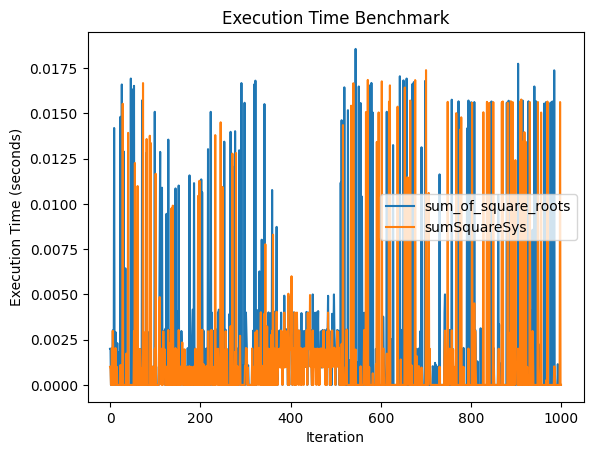

In [32]:
import matplotlib.pyplot as plt
# Plotting the execution times
plt.plot(range(iter), exec_time_1, label='sum_of_square_roots')
plt.plot(range(iter), exec_time_2, label='sumSquareSys')
plt.xlabel('Iteration')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Execution Time Benchmark')
plt.show()

In [33]:

def logSum(array,k=0.5):
    mult = 1
    for element in array:
        mult *= element
    mult = math.log(mult) * k
    return mult


def logSolver(seq1,seq2,k=0.5):
    val_1 = logSum(seq1,k)
    val_2 = logSum(seq2,k)
    return val_1 > val_2

# Example usage:
sequence_a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
sequence_b = [2, 5, 8, 10, 2, 123, 4, 5, 234, 2, 14]

print(logSolver(sequence_a, sequence_b))
print(sum_of_square_roots(sequence_a,sequence_b))




False
False


In [37]:
acc = 0
iter = 1000
values_diff_1 = []
values_diff_2 = []
exec_time_1 = []
exec_time_2 = []
for i in range(iter):
    length = int(random.uniform(10,10000))
    seq_a = [int(random.uniform(5,1000)) for i in range(length)]
    seq_b = [int(random.uniform(5,1000)) for i in range(length)]
    
    start = time.time()
    result_1 = sum_of_square_roots(seq_a,seq_b)
    exec_time_1.append(time.time() - start)
    start = time.time()
    result_2 = logSolver(seq_a,seq_b,k=0.5)
    exec_time_2.append(time.time() - start)
    print(result_1,result_2)
    if result_1 != result_2:
        print(i)
        values_diff_1.append(seq_a)
        values_diff_1.append(seq_b)

    acc += (result_1 == result_2) / iter

True True
True True
False False
True True
False False
False False
True True
True True
True True
True True
False False
True True
False False
True True
True True
True True
True True
True True
False False
False False
True True
False False
True True
True True
False False
True True
True True
True True
True True
False False
True True
True True
True True
False False
True True
True True
False False
False False
True True
True True
True True
False False
False False
False False
True True
True True
False False
True True
True True
False False
False False
True True
False False
True True
True True
False False
True True
False False
False False
True True
False False
True True
False False
False False
True True
False False
False False
True True
True True
True True
False False
False False
True True
True True
False False
True True
True True
True True
True True
True True
True True
False False
True True
True True
True True
True True
True True
False False
False False
True True
True True
True True
False False


In [35]:
print(acc)

1.0000000000000007


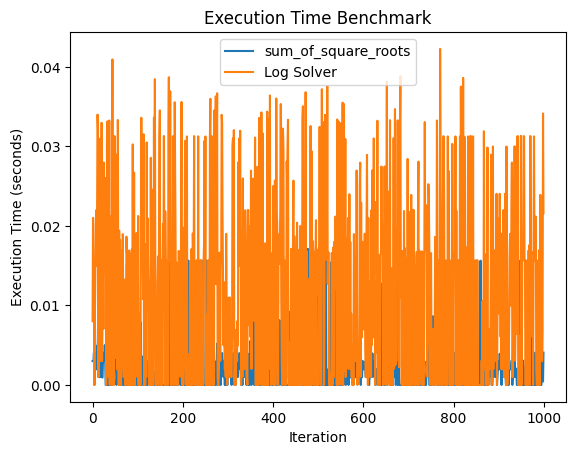

In [25]:
import matplotlib.pyplot as plt
# Plotting the execution times
plt.plot(range(iter), exec_time_1, label='sum_of_square_roots')
plt.plot(range(iter), exec_time_2, label='Log Solver')
plt.xlabel('Iteration')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Execution Time Benchmark')
plt.show()

In [155]:
import math
import numpy as np
import timeit
import random
import time

def calculate_differences(seq):
    differences = [seq[i+1] - seq[i] for i in range(len(seq)-1)]
    return sum(differences)


def sum_of_square_roots(sequence1, sequence2):
    seq_1_result = sum(x ** 0.5 for x in sequence1)
    seq_2_result = sum(x ** 0.5 for x in sequence2)

    
    return seq_1_result, seq_2_result

def valSumQuad(sequence1, sequence2):
    

    sorted_seq_1 = sorted(sequence1)
    sorted_seq_2 = sorted(sequence2)
    
    valSum_1 = 0
    valSum_2 = 0
    for i in range(1,len(sorted_seq_1)//2):
        valSum_1 += (sorted_seq_1[i]*sorted_seq_1[-i]) 
        valSum_2 += (sorted_seq_2[i]*sorted_seq_2[-i]) 

    quantile_ratio_1 = (sum(sorted_seq_1[0:length]) * (sum(sorted_seq_1[length:length*2])))
    quantile_ratio_2 = (sum(sorted_seq_2[0:length]) * (sum(sorted_seq_2[length:length*2])))

    total_1 = (0.25 * quantile_ratio_1 + valSum_1 * 0.75)
    total_2 = (0.25 * quantile_ratio_2 + valSum_2 * 0.75)


    return total_1 > total_2

# Example usage:
sequence_a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
sequence_b = [1,2,3,4,5,6,7,9,10,11,12,13]

print(valSumQuad(sequence_a, sequence_b))
print(sum_of_square_roots(sequence_a,sequence_b))

False
(25.932379801341852, 30.02612874241505)


In [153]:
acc = 0
iter = 1000
values_diff_1 = []
values_diff_2 = []
exec_time_1 = []
exec_time_2 = []
for i in range(iter):
    length = int(random.uniform(10,10000))
    seq_a = [int(random.uniform(5,1000)) for i in range(length)]
    seq_b = [int(random.uniform(5,1000)) for i in range(length)]
    
    start = time.time()
    result_1_root1,result_1_root2= sum_of_square_roots(seq_a,seq_b)
    exec_time_1.append(time.time() - start)
    start = time.time()
    result_2_root1,result_2_root2 = valSumQuad(seq_a,seq_b)
    exec_time_2.append(time.time() - start)
    result_1 = result_1_root1>result_1_root2
    result_2 = result_2_root1>result_2_root2
    if  result_1 != result_2 :
        print(result_1_root1-result_1_root2,result_2_root1-result_2_root2)
        values_diff_1.append(seq_a)
        values_diff_1.append(seq_b)

    acc += (result_1 == result_2) / iter

-84.56461800177931 528513.0
-14.82509801260312 246247.5
24.596006260100694 -480373.5
-143.17806454055244 746901.0
-26.908442448082496 72734.25
29.123366261046613 -651406.5
4.782298092803103 -1325153.25
46.01298217786825 -394319.25
2.7084789555810858 -271486.5
35.82185872374612 -67917.0
-5.905612888873293 189984.75
-77.23342378172674 295611.75
42.504869097145274 -2052993.0
-58.63798690139083 961242.75
116.44031598902075 -115490.25
32.546217942173826 -715871.25
-8.55268713577243 117945.75
34.088893987907795 -35592.75
2.689926786988508 -92922.75
89.81609693693463 -915105.75
29.28557982458733 -711240.0
-1.3879277759115212 1130097.0
36.778026813364704 -412055.25
25.03983255874482 -1859621.25
-29.06887283967808 420335.25
8.15356090028672 -382898.25
-32.829925724770874 823257.0
-76.00697102971026 1661057.25
50.44157791764883 -464530.5
18.668224308581557 -135866.25
3.6655397508875467 -377837.25
30.803771735721966 -147279.0
133.988123832969 -1727237.25
-24.14587832255347 563832.75
29.8881022882

In [154]:
acc

0.9550000000000007

In [126]:
def logSum(array,k=0.5):
    mult = 1
    for element in array:
        mult *= element
    mult = math.log(mult) * k
    return mult

def logSumSeperate(array,k=0.5):
    mult = 1
    for element in array:
        mult += element**k
    mult = math.log(mult) 
    return mult


In [127]:
logSumValues = []
logSumSeperateValues = []
iter = 100
for i in range(2,iter):
    seq_a = [j for j in range(i,i+100)]
    val_1 = logSum(seq_a,k=0.1)
    val_2 = logSumSeperate(seq_a,k=0.1)
    logSumValues.append(val_1 / val_2)

In [128]:
logSumValues

[7.390886740421183,
 7.464492161641665,
 7.530522848089505,
 7.591236686145157,
 7.647869425679941,
 7.701201822059427,
 7.751772026752719,
 7.79997342548759,
 7.846106052958468,
 7.890406220910734,
 7.933064801913395,
 7.974239127122728,
 8.014061063548922,
 8.05264269099093,
 8.090080408913526,
 8.126457981093576,
 8.161848840674484,
 8.196317867373823,
 8.22992277976479,
 8.26271524149083,
 8.29474175128817,
 8.326044367160538,
 8.356661301606376,
 8.386627415365403,
 8.41597463041704,
 8.444732278079698,
 8.472927394468089,
 8.500584972888834,
 8.527728180736203,
 8.554378546910515,
 8.580556124596137,
 8.606279633313981,
 8.63156658344026,
 8.656433385811152,
 8.680895448577163,
 8.704967263105065,
 8.728662480429554,
 8.751993979516227,
 8.774973928400852,
 8.79761383910793,
 8.81992461711775,
 8.841916606039792,
 8.863599628057518,
 8.8849830206314,
 8.906075669881567,
 8.926886041015662,
 8.947422206120386,
 8.96769186959493,
 8.987702391469973,
 9.007460808826501,
 9.026973855

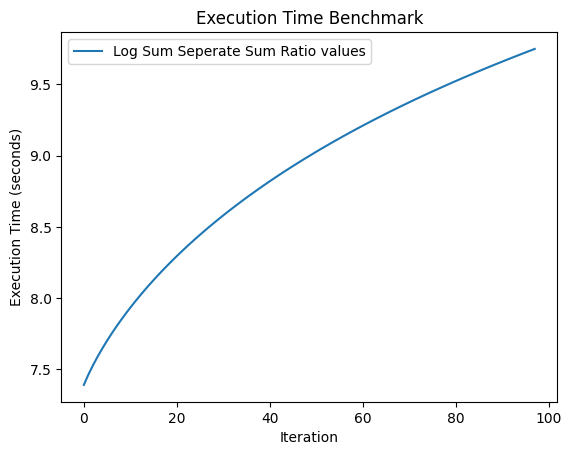

In [129]:
import matplotlib.pyplot as plt
# Plotting the execution times
plt.plot(range(len(logSumValues)), logSumValues, label='Log Sum Seperate Sum Ratio values')
plt.xlabel('Iteration')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Execution Time Benchmark')
plt.show()

In [296]:
def sum_of_square_roots(sequence1, sequence2):
    seq_1_result = sum(x ** 0.5 for x in sequence1)
    seq_2_result = sum(x ** 0.5 for x in sequence2)

    
    return seq_1_result > seq_2_result

In [321]:

def multArrayOperator(array):
    mult = 1
    rangeVal = int(len(array))
    for i in range(rangeVal):
        mult *= array[i]
        
        
    return mult*np.mean(array)*sum(array)


def multSolver(seq1,seq2):
    val_1 = multArrayOperator(seq1)
    val_2 = multArrayOperator(seq2)
    return val_1 > val_2

# Example usage:
sequence_a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
sequence_b = [2, 5, 8, 10, 2, 123, 4, 5, 234, 2, 14]

print(multSolver(sequence_a, sequence_b))
print(sum_of_square_roots(sequence_a,sequence_b))




False
False


In [322]:
acc = 0
iter = 1000
values_diff_1 = []
values_diff_2 = []
exec_time_1 = []
exec_time_2 = []
for i in range(iter):
    length = int(random.uniform(10,100))
    seq_a = [int(random.uniform(5,length)) for i in range(length)]
    seq_b = [int(random.uniform(5,length)) for i in range(length)]
    
    start = time.time()
    result_1 = sum_of_square_roots(seq_a,seq_b)
    exec_time_1.append(time.time() - start)
    start = time.time()
    result_2 = multSolver(seq_a,seq_b)
    exec_time_2.append(time.time() - start)
    if result_1 != result_2:
        print(i)
        values_diff_1.append(seq_a)
        values_diff_1.append(seq_b)

    acc += (result_1 == result_2) / iter

34
72
76
83
93
94
102
129
142
146
165
166
171
203
216
291
311
320
356
446
465
468
471
488
548
603
610
633
689
709
724
739
740
756
797
829
853
857
892
902
929
931
942
972
974
982


In [323]:
acc

0.9540000000000007

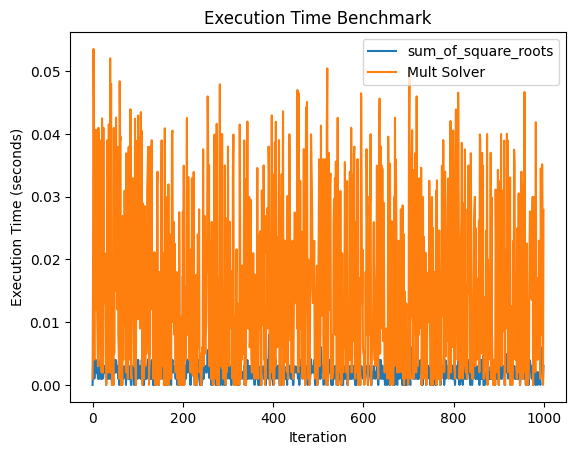

In [113]:
import matplotlib.pyplot as plt
# Plotting the execution times
plt.plot(range(iter), exec_time_1, label='sum_of_square_roots')
plt.plot(range(iter), exec_time_2, label='Mult Solver')
plt.xlabel('Iteration')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Execution Time Benchmark')
plt.show()

In [402]:
def sum_of_square_roots(sequence1, sequence2):
    seq_1_result = sum(x ** 0.5 for x in sequence1)
    seq_2_result = sum(x ** 0.5 for x in sequence2)

    
    return seq_1_result > seq_2_result


def compareArrays(array1,array2):
    sorted_array_1 = sorted(array1)
    sorted_array_2 = sorted(array2)


    val = 0
    for a,b in zip(sorted_array_1,sorted_array_2):
        if a > b:
            val += (a-b)/a 
        elif b > a:
            val -= (b-a)/b 
        else:
            continue
        
    if val > 0:
        return True
    else:
        return False
    

# Example usage:
sequence_a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
sequence_b = [2, 5, 8, 10, 2, 123, 4, 5, 234, 2, 14]

print(compareArrays(sequence_a, sequence_b))
print(sum_of_square_roots(sequence_a,sequence_b))

    

False
False


In [403]:
acc = 0
iter = 1000
values_diff_1 = []
values_diff_2 = []
exec_time_1 = []
exec_time_2 = []
for i in range(iter):
    length = int(random.uniform(10,10000))
    seq_a = [int(random.uniform(5,length)) for i in range(length)]
    seq_b = [int(random.uniform(5,length)) for i in range(length)]
    
    start = time.time()
    result_1 = sum_of_square_roots(seq_a,seq_b)
    exec_time_1.append(time.time() - start)
    start = time.time()
    result_2 = compareArrays(seq_a,seq_b)
    exec_time_2.append(time.time() - start)
    if result_1 != result_2:
        print(i)
        values_diff_1.append(seq_a)
        values_diff_1.append(seq_b)

    acc += (result_1 == result_2) / iter

2
3
38
52
72
73
93
97
127
135
144
163
166
173
174
186
197
211
225
245
251
257
267
274
308
329
330
334
343
355
375
381
400
402
403
404
443
449
461
472
475
482
502
515
530
534
555
556
571
593
597
599
609
619
622
625
642
643
650
654
655
664
678
680
722
733
734
740
753
755
769
777
804
814
821
854
869
870
875
876
879
880
882
886
892
901
902
914
925
927
928
931
956
982
992


In [399]:
acc

0.5420000000000004